Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

 Importing the dataset

In [2]:
dataset = pd.read_csv('dataset1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[['Alice' 'Female' 28.0 50000.0]
 ['Bob' 'Male' nan 60000.0]
 ['Charlie' 'Male' 22.0 nan]
 ['David' 'Male' 45.0 75000.0]
 ['Eve' 'Female' nan 28000.0]
 ['Frank' 'Male' 35.0 70000.0]
 ['Grace' 'Female' 24.0 48000.0]
 ['Hannah' 'Female' 31.0 nan]]


In [4]:
print(y)

['Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No']


Taking care of missing data

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 3:])
X[:, 3:] = imputer.transform(X[:, 3:])

In [6]:
print(X)

[['Alice' 'Female' 28.0 50000.0]
 ['Bob' 'Male' nan 60000.0]
 ['Charlie' 'Male' 22.0 55166.666666666664]
 ['David' 'Male' 45.0 75000.0]
 ['Eve' 'Female' nan 28000.0]
 ['Frank' 'Male' 35.0 70000.0]
 ['Grace' 'Female' 24.0 48000.0]
 ['Hannah' 'Female' 31.0 55166.666666666664]]


Encoding the Independent Variable

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_indices = [0, 1]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_indices)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 28.0 50000.0]
 [0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 nan 60000.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 22.0 55166.666666666664]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 45.0 75000.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 nan 28000.0]
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 35.0 70000.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 24.0 48000.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 31.0 55166.666666666664]]


Encoding the Dependent Variable

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
print(y)

[1 1 0 1 0 1 1 0]


Splitting the dataset into the Training set and Test set




In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
print(X_train)

[[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 nan 60000.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 24.0 48000.0]
 [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 28.0 50000.0]
 [0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 nan 28000.0]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 45.0 75000.0]
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 35.0 70000.0]]


In [13]:
print(X_test)

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 31.0 55166.666666666664]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 22.0 55166.666666666664]]


In [14]:
print(y_train)

[1 1 1 0 1 1]


In [15]:
print(y_test)

[0 0]


Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train)

[[-0.4472136   2.23606798  0.         -0.4472136  -0.4472136  -0.4472136
  -0.4472136   0.         -1.          1.                 nan  0.31060931]
 [-0.4472136  -0.4472136   0.         -0.4472136  -0.4472136  -0.4472136
   2.23606798  0.          1.         -1.         -1.12942045 -0.46055864]
 [ 2.23606798 -0.4472136   0.         -0.4472136  -0.4472136  -0.4472136
  -0.4472136   0.          1.         -1.         -0.62745581 -0.33203065]
 [-0.4472136  -0.4472136   0.         -0.4472136   2.23606798 -0.4472136
  -0.4472136   0.          1.         -1.                 nan -1.74583856]
 [-0.4472136  -0.4472136   0.          2.23606798 -0.4472136  -0.4472136
  -0.4472136   0.         -1.          1.          1.50589393  1.27456926]
 [-0.4472136  -0.4472136   0.         -0.4472136  -0.4472136   2.23606798
  -0.4472136   0.         -1.          1.          0.25098232  0.95324928]]


In [18]:
print(X_test)

[[-0.4472136  -0.4472136   0.         -0.4472136  -0.4472136  -0.4472136
  -0.4472136   1.          1.         -1.         -0.25098232  0.        ]
 [-0.4472136  -0.4472136   1.         -0.4472136  -0.4472136  -0.4472136
  -0.4472136   0.         -1.          1.         -1.38040277  0.        ]]


In [19]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_X = min_max_scaler.fit_transform(X[:, :2])

In [20]:
scaled_age_column = scaled_X[:, 0]
scaled_salary_column = scaled_X[:, 1]

In [21]:
scaled_age_column

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
scaled_salary_column

array([0., 1., 0., 0., 0., 0., 0., 0.])

Create scatter plot

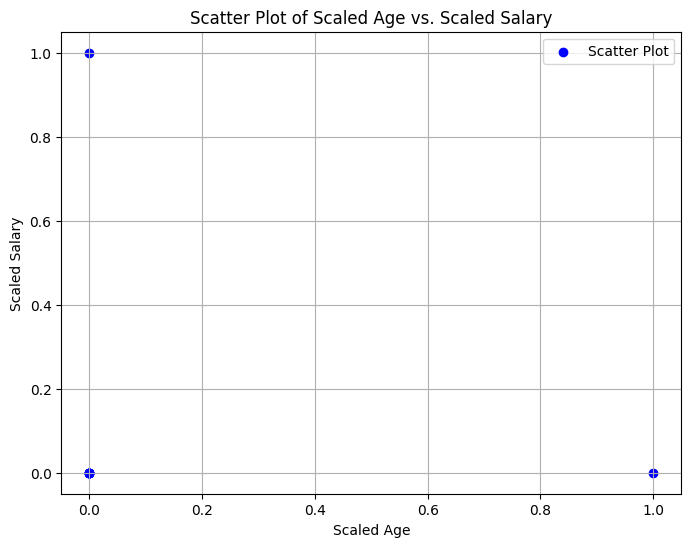

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_age_column, scaled_salary_column, c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot of Scaled Age vs. Scaled Salary')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Salary')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
age_column = X[:, 0]
salary_column = X[:, 1]

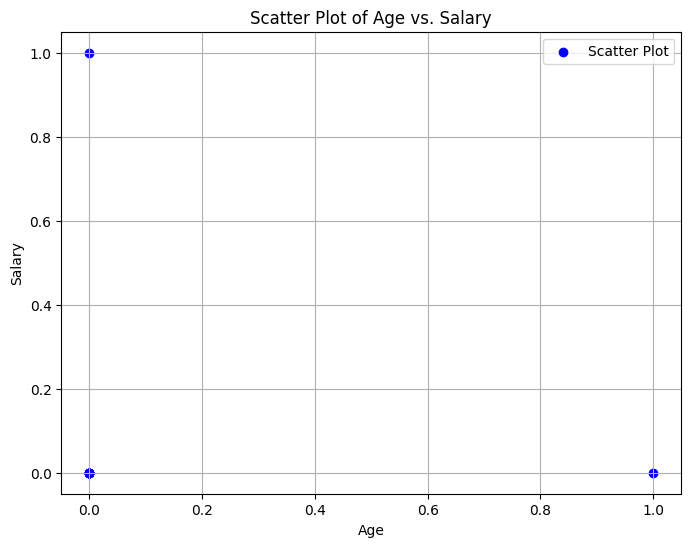

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(age_column, salary_column, c='blue', marker='o', label='Scatter Plot')
plt.title('Scatter Plot of Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()